In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import re
from sklearn.metrics.pairwise import cosine_similarity  # Correct import
import numpy as np


In [131]:

# Đọc dữ liệu từ tập CSV vào DataFrame
df = pd.read_csv('DATADULICHQUYNHON.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df


,Name_Hotel,original_price_list,Link,star_rating_hotel_list,Location,Convenient,Aria_locations,Comment_Hotel,User_vote_hotel,Review_Hotel,hightlight_Hotel
0,Grand Hyams Hotel - Quy Nhon Beach,3950100,https://www.booking.com/hotel/vn/grand-hyams-q...,5.0,"28 Nguyen Hue, Le Loi ward, Quy Nhon city, Bin...","Hồ bơi trong nhà, WiFi miễn phí, Phòng gia ...","Tượng Đài Chiến Thắng: 150 m, Công Viên Bàu Se...","Tram(Việt Nam): “Sang trọng, yên tĩnh, các bạ...",9.3,"Nằm ở Quy Nhơn, cách Quy Nhon Beach 2 phút đi ...","Nhìn ra biển,Nhìn ra địa danh nổi tiếng,Hồ bơi..."
1,FLC City Hotel Beach Quy Nhon,3937950,https://www.booking.com/hotel/vn/flc-beach-cit...,5.0,"An Duong Vuong Road Quy Nhon City, Binh Dinh P...","Hồ bơi trong nhà, Giáp biển, WiFi miễn phí, ...","Công Viên: 300 m, Đu Quay Uốn Lượn: 400 m, Côn...","Huy(Việt Nam): “Phòng rộng, view đẹp, vị trí ...",8.6,"Nằm giáp biển, FLC City Hotel Beach Quy Nhon c...","Nhìn ra biển, Địa điểm hàng đầu: Được khách gầ..."
2,RAON Hotel - STAY 24H,1426513,https://www.booking.com/hotel/vn/nam-thu.vi.ht...,4.0,"09 Nguyễn Thị Định, Quy Nhơn, Việt Nam","Hồ bơi ngoài trời, Giáp biển, WiFi miễn phí,...","Công Viên: 500 m, Công Viên: 600 m, Đu Quay Uố...","Gabriel(Việt Nam): “Mọi thứ đều ổn, sạch sẽ, ...",9.3,"Tọa lạc ở Quy Nhơn, cách Quy Nhon Beach 7 phút...","Hồ bơi có tầm nhìn,Hướng nhìn ra đường phố yên..."
3,MENTO HOTEL QUY NHƠN,1863000,https://www.booking.com/hotel/vn/mento-quy-nho...,3.0,"Nguyễn Huệ 409C - 409D, Quy Nhơn, Việt Nam","3 hồ bơi, Giáp biển, WiFi miễn phí, Xe đưa đ...","Ngã 6 Ngô Mây: 250 m, Công Viên: 400 m, Đu Qua...",No comment,8.4,"Nằm giáp biển, MENTO HOTEL QUY NHƠN cung cấp c...","Nhìn ra thành phố,Nhìn ra núi,Nhìn ra địa danh..."
4,Moon's House Homestay Quy Nhơn,1050000,https://www.booking.com/hotel/vn/moon-39-s-hou...,2.0,"82 Vũ Bảo, Quy Nhơn, Việt Nam","WiFi miễn phí, Xe đưa đón sân bay, Phòng g...","Ngã 6 Ngô Mây: 350 m, Công Viên: 550 m, Đu Qua...","Vy(Việt Nam): “Không gian vừa đủ, sạch sẽ, mề...",9.5,Nằm ở Quy Nhơn và cách Quy Nhon Beach chưa đến...,"Sân hiên, Địa điểm hàng đầu: Được khách gần đâ..."
...,...,...,...,...,...,...,...,...,...,...,...
438,Q House- Green Villa Quy Nhơn,8967240,https://www.booking.com/hotel/vn/q-house-homes...,0.0,"70/14/12 70/14/13 Han Mac Tu, Ghenh Rang Ward,...","WiFi miễn phí, Xe đưa đón sân bay, Phòng g...","Công Viên: 600 m, Công Viên: 1,1 km, Đu Quay U...",No comment,9.0,"Cách Quy Nhon Beach 4 phút đi bộ, Q House- Gre...","Nhìn ra thành phố,Sân hiên,Nhìn ra vườn,Hướng ..."
439,Căn hộ du lịch Quy Nhơn giá rẻ-view biển 7,2904000,https://www.booking.com/hotel/vn/quy-nhon-colo...,0.0,"Chung cư An Phú Thịnh Garden Tower, Khu đô thị...","WiFi miễn phí, Chỗ đỗ xe miễn phí","Công Viên Đống Đa: 2,7 km, Công Viên Đống Đa: ...",No comment,8.4,"Tọa lạc ở Quy Nhơn thuộc Bình Định, Căn hộ du ...",Sân hiênNo hightlight
440,Quy Nhon Homestay BnB,8997000,https://www.booking.com/hotel/vn/quynhonhomest...,0.0,"20 Trần Kỳ Phong, Quy Nhơn, Bình Định, Quy Nhơ...","Giáp biển, WiFi miễn phí, Xe đưa đón sân ba...","Công Viên: 500 m, Công Viên: 900 m, Đu Quay Uố...",Hồng(Việt Nam): “Hàng xóm thân thiện! Địa điể...,8.4,Nằm ở Quy Nhơn và cách Quy Nhon Beach 6 phút đ...,"Nhìn ra thành phố,Nhìn ra núi,Sân hiên,Hướng n..."
441,CĂN HỘ QUY NHƠN,5400000,https://www.booking.com/hotel/vn/can-ho-quy-nh...,0.0,"76 Trần Hưng Đạo 26, Quy Nhơn, Việt Nam","Hồ bơi, WiFi miễn phí, Chỗ đỗ xe miễn phí","Tượng Đài Chiến Thắng: 750 m, Công Viên Đống Đ...",No comment,8.4,No review,Sân hiênNo hightlight


In [132]:
df.columns

Index(['Name_Hotel', 'original_price_list', 'Link', 'star_rating_hotel_list',
       'Location', 'Convenient', 'Aria_locations', 'Comment_Hotel',
       'User_vote_hotel', 'Review_Hotel', 'hightlight_Hotel'],
      dtype='object')

In [133]:
df.isnull().sum()

Name_Hotel                0
original_price_list       0
Link                      0
star_rating_hotel_list    0
Location                  0
Convenient                0
Aria_locations            0
Comment_Hotel             0
User_vote_hotel           0
Review_Hotel              0
hightlight_Hotel          0
dtype: int64

# Không dùng PCA

In [147]:
# Xử lý dữ liệu, nếu cần
# Ví dụ: Kết hợp các trường 'Tên khách sạn' và 'Tiện ích' thành một trường duy nhất 'Mô tả'
#df['Mô tả'] = df['Name_Hotel'] + ' ' + df['star_rating_hotel_list'] + ' ' + df['voting_user_list'] + ' ' + df['review_list']
#numeric_columns = ['star_rating_hotel_list', 'User_vote_hotel','original_price_list','Location', 'Convenient', 'Aria_locations', 'Comment_Hotel','Review_Hotel', 'hightlight_Hotel']

# Tạo cột 'description' chỉ từ các cột giá trị số
df['description'] = (
    
    df['Location'].astype(str)+
    ' ' +
    df['Convenient'].astype(str)+
    ' ' +
    df['Aria_locations'].astype(str)+
    ' ' +
    df['Comment_Hotel'].astype(str)+
    ' ' +
    df['Review_Hotel'].astype(str)+
    ' ' +
    df['hightlight_Hotel'].astype(str)
)
# Sử dụng TF-IDF để biểu diễn văn bản thành ma trận số
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['description'].fillna(''))

# Tính cosine similarity giữa các khách sạn
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

# Hàm đề xuất dựa trên cosine similarity
def content_based_recommendation(hotel_name, cosine_similarities, df):
    hotel_index = df[df['Name_Hotel'] == hotel_name].index
    if not hotel_index.empty:
        hotel_index = hotel_index[0]
        similar_hotels = list(enumerate(cosine_similarities[hotel_index]))
        similar_hotels = sorted(similar_hotels, key=lambda x: x[1], reverse=True)
        similar_hotels = similar_hotels[1:11]  # Lấy 10 khách sạn tương tự

        # Lấy tất cả giá trị từ danh sách similar_hotels
        recommended_hotels = [df.iloc[hotel[0]]['Name_Hotel'] for hotel in similar_hotels]
        return recommended_hotels
    else:
        print(f'Hotel not found: {hotel_name}')
        return []

# Đề xuất 10 khách sạn tương tự với khách sạn có tên là 'Tên khách sạn cần đề xuất'
recommended_hotels = content_based_recommendation("Grand Hyams Hotel - Quy Nhon Beach", cosine_similarities, df)
print(recommended_hotels)

['FLC City Hotel Beach Quy Nhon', 'Pearl Beach Hotel Quy Nhon', 'Fleur de Lys Hotel Quy Nhon', 'Anya Hotel Quy Nhon', 'Grand Hyams Hotel - TMS Tầng 21 View Biển Quy Nhơn - 2PN', 'Khách Sạn Thành Nhân', 'CALI HOTEL Quy Nhon', 'MENTO HOTEL QUY NHƠN', 'Anantara Quy Nhon Villas', 'Thanh Van Hotel Quy Nhon']


In [148]:
print(cosine_similarities)
cosine_similarities.shape

[[1.         0.54767981 0.41389345 ... 0.39418713 0.25257051 0.38137306]
 [0.54767981 1.         0.39242016 ... 0.38773626 0.21994392 0.3679579 ]
 [0.41389345 0.39242016 1.         ... 0.41176207 0.21369565 0.3239924 ]
 ...
 [0.39418713 0.38773626 0.41176207 ... 1.         0.31382945 0.44201797]
 [0.25257051 0.21994392 0.21369565 ... 0.31382945 1.         0.67317604]
 [0.38137306 0.3679579  0.3239924  ... 0.44201797 0.67317604 1.        ]]


(443, 443)

In [149]:
for i in range(3):
    print(result_df['Information'][i])

FLC City Hotel Beach Quy Nhon: {'Name_Hotel': 'FLC City Hotel Beach Quy Nhon', 'original_price_list': 3937950, 'Link': 'https://www.booking.com/hotel/vn/flc-beach-city-quy-nhon.vi.html?label=gen173nr-1FCAEoggI46AdIM1gEaPQBiAEBmAEquAEXyAEM2AEB6AEB-AELiAIBqAIDuAKutIavBsACAdICJDgxNmM1ODQyLWRiNGMtNGZhZC1iYzkxLTg2MDM3MmM4NDE4NNgCBuACAQ&sid=eceff66f0c492ef7b95dec3d8b86b680&aid=304142&ucfs=1&arphpl=1&checkin=2024-03-13&checkout=2024-03-16&dest_id=-3727579&dest_type=city&group_adults=1&req_adults=1&no_rooms=1&group_children=1&req_children=1&age=7&req_age=7&hpos=2&hapos=2&sr_order=popularity&srpvid=168041259af5048a&srepoch=1709284560&all_sr_blocks=759894504_333145989_0_1_0&highlighted_blocks=759894504_333145989_0_1_0&matching_block_id=759894504_333145989_0_1_0&sr_pri_blocks=759894504_333145989_0_1_0__393795000&from=searchresults#hotelTmpl', 'star_rating_hotel_list': 5.0, 'Location': 'An Duong Vuong Road Quy Nhon City, Binh Dinh Province, Quy Nhơn, Việt Nam', 'Convenient': 'Hồ bơi trong nhà, Gi

In [150]:
import pandas as pd
hotels_to_check = recommended_hotels

# Create an empty DataFrame
result_df = pd.DataFrame(columns=['Hotel', 'Target Hotel', 'Similarity Score', 'Information'])

# Target hotel for comparison
target_hotel = "Grand Hyams Hotel - Quy Nhon Beach"

# Check the similarities between the specified hotels and the target hotel
for hotel_name in hotels_to_check:
    # Check if both hotels are in the DataFrame
    if hotel_name in df['Name_Hotel'].values and target_hotel in df['Name_Hotel'].values:
        # Calculate the cosine similarity between the two hotels
        hotel_index = df[df['Name_Hotel'] == hotel_name].index[0]
        target_index = df[df['Name_Hotel'] == target_hotel].index[0]
        similarity_score = cosine_similarities[hotel_index, target_index]

        # Get the information for each hotel
        hotel_info = df.iloc[hotel_index].to_dict()
        target_info = df.iloc[target_index].to_dict()

        # Append information to the result DataFrame
        result_df = result_df.append({
            'Hotel': hotel_name,
            'Target Hotel': target_hotel,
            'Similarity Score': similarity_score,
            'Information': f"{hotel_name}: {hotel_info}\n{target_hotel}: {target_info}"
        }, ignore_index=True)
    else:
        result_df = result_df.append({
            'Hotel': hotel_name,
            'Target Hotel': target_hotel,
            'Similarity Score': 'Not found',
            'Information': 'At least one of the hotels not found'
        }, ignore_index=True)

# Display the result DataFrame
result_df


,Hotel,Target Hotel,Similarity Score,Information
0,FLC City Hotel Beach Quy Nhon,Grand Hyams Hotel - Quy Nhon Beach,0.547680,FLC City Hotel Beach Quy Nhon: {'Name_Hotel': ...
1,Pearl Beach Hotel Quy Nhon,Grand Hyams Hotel - Quy Nhon Beach,0.536724,Pearl Beach Hotel Quy Nhon: {'Name_Hotel': 'Pe...
2,Fleur de Lys Hotel Quy Nhon,Grand Hyams Hotel - Quy Nhon Beach,0.532963,Fleur de Lys Hotel Quy Nhon: {'Name_Hotel': 'F...
3,Anya Hotel Quy Nhon,Grand Hyams Hotel - Quy Nhon Beach,0.527037,Anya Hotel Quy Nhon: {'Name_Hotel': 'Anya Hote...
4,Grand Hyams Hotel - TMS Tầng 21 View Biển Quy ...,Grand Hyams Hotel - Quy Nhon Beach,0.523870,Grand Hyams Hotel - TMS Tầng 21 View Biển Quy ...
5,Khách Sạn Thành Nhân,Grand Hyams Hotel - Quy Nhon Beach,0.517479,Khách Sạn Thành Nhân: {'Name_Hotel': 'Khách Sạ...
6,CALI HOTEL Quy Nhon,Grand Hyams Hotel - Quy Nhon Beach,0.517219,CALI HOTEL Quy Nhon: {'Name_Hotel': 'CALI HOTE...
7,MENTO HOTEL QUY NHƠN,Grand Hyams Hotel - Quy Nhon Beach,0.513754,MENTO HOTEL QUY NHƠN: {'Name_Hotel': 'MENTO HO...
8,Anantara Quy Nhon Villas,Grand Hyams Hotel - Quy Nhon Beach,0.511061,Anantara Quy Nhon Villas: {'Name_Hotel': 'Anan...
9,Thanh Van Hotel Quy Nhon,Grand Hyams Hotel - Quy Nhon Beach,0.507020,Thanh Van Hotel Quy Nhon: {'Name_Hotel': 'Than...


# 3 Field numeric và 6 field Obj

In [128]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

# Assume df is your DataFrame containing the columns 'star_rating_hotel_list', 'original_price_list', 'User_vote_hotel', and 'Name_Hotel'

df['description'] = (
    # df['star_rating_hotel_list'].astype(str) +
    # ' ' +
    # df['original_price_list'].astype(str) +
    # ' ' +
    # df['User_vote_hotel'].astype(str)+
    # ' ' +
    df['Location'].astype(str)+
    ' ' +
    df['Convenient'].astype(str)+
    ' ' +
    df['Aria_locations'].astype(str)+
    ' ' +
    df['Comment_Hotel'].astype(str)+
    ' ' +
    df['Review_Hotel'].astype(str)+
    ' ' +
    df['hightlight_Hotel'].astype(str)
)

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['description'])

# Sử dụng PCA để giảm chiều dữ liệu
# num_components = 2
# pca = PCA(n_components=num_components)
# pca_result = pca.fit_transform(tfidf_matrix.toarray())
scaler_star_rating = StandardScaler()
df['star_rating_hotel_list_normalized'] = scaler_star_rating.fit_transform(df[['star_rating_hotel_list']])

# Chuẩn hóa cột 'original_price_list'
scaler_original_price = StandardScaler()
df['original_price_list_normalized'] = scaler_original_price.fit_transform(df[['original_price_list']])

# Chuẩn hóa cột 'User_vote_hotel'
scaler_user_vote = StandardScaler()
df['User_vote_hotel_normalized'] = scaler_user_vote.fit_transform(df[['User_vote_hotel']])

# scaler_user_vote = StandardScaler()
# df['Location_normalized'] = scaler_user_vote.fit_transform(df[['Location']])
# scaler_user_vote = StandardScaler()
# df['Convenient_normalized'] = scaler_user_vote.fit_transform(df[['Convenient']])
# scaler_user_vote = StandardScaler()
# df['Aria_locations_normalized'] = scaler_user_vote.fit_transform(df[['Aria_locations']])
# scaler_user_vote = StandardScaler()
# df['Comment_Hotel_normalized'] = scaler_user_vote.fit_transform(df[['Comment_Hotel']])
# scaler_user_vote = StandardScaler()
# df['Review_Hotel_normalized'] = scaler_user_vote.fit_transform(df[['Review_Hotel']])
# scaler_user_vote = StandardScaler()
# df['hightlight_Hotel_normalized'] = scaler_user_vote.fit_transform(df[['hightlight_Hotel']])
# # Chuyển đổi thành dạng One-Hot Encoding
df = pd.get_dummies(df, columns=['star_rating_hotel_list', 'original_price_list', 'User_vote_hotel'])

columns_for_pca = ['star_rating_hotel_list_normalized', 'original_price_list_normalized', 'User_vote_hotel_normalized']


# # Sử dụng PCA để giảm chiều dữ liệu
num_components = 2
pca = PCA(n_components=num_components)
pca_result = pca.fit_transform(df[columns_for_pca])

combined_features = np.hstack((pca_result, tfidf_matrix.toarray()))

# Tính độ tương tự cosine giữa khách sạn mẫu và tất cả các khách sạn
similarity_scores = cosine_similarity(combined_features)
# Sử dụng TF-IDF để chuyển đổi văn bản thành vector
def content_based_recommendation(hotel_name, similarity_scores, df):
    hotel_index = df[df['Name_Hotel'] == hotel_name].index
    if not hotel_index.empty:
        hotel_index = hotel_index[0]
        similar_hotels = list(enumerate(similarity_scores[hotel_index]))
        similar_hotels = sorted(similar_hotels, key=lambda x: x[1], reverse=True)
        similar_hotels = similar_hotels[1:11]  # Lấy 10 khách sạn tương tự

        # Lấy tất cả giá trị từ danh sách similar_hotels
        recommended_hotels = [df.iloc[hotel[0]]['Name_Hotel'] for hotel in similar_hotels]
        return recommended_hotels
    else:
        print(f'Hotel not found: {hotel_name}')
        return []

# Đề xuất 10 khách sạn tương tự với khách sạn có tên là 'Tên khách sạn cần đề xuất'
recommended_hotels = content_based_recommendation("Grand Hyams Hotel - Quy Nhon Beach", similarity_scores, df)
print(recommended_hotels)



['TMS Pullman Căn Hộ Cao Cấp Quy Nhơn', 'FLC City Hotel Beach Quy Nhon', 'FLC Sea Tower Quy Nhơn- Đông Ngô House', 'Seaside Boutique Resort Quy Nhon', 'TMS Pullman Quy Nhơn The Maison House', 'FLC Sea Tower Qui Nhơn Apartment - Căn Hộ Sea View', "L'amor Boutique Hotel Quy Nhơn", 'Armin Homes Altara Residences Quy Nhon', 'Anya Premier Hotel Quy Nhon', 'TMS Luxury Condotel Quy Nhơn - Ban Công View Biển']


In [129]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
hotels_to_check = recommended_hotels


# Create an empty DataFrame
result_df = pd.DataFrame(columns=['Hotel', 'Target Hotel', 'Similarity Score', 'Information'])

# Target hotel for comparison
target_hotel = "Grand Hyams Hotel - Quy Nhon Beach"

# Check the similarities between the specified hotels and the target hotel
for hotel_name in hotels_to_check:
    # Check if both hotels are in the DataFrame
    if hotel_name in df['Name_Hotel'].values and target_hotel in df['Name_Hotel'].values:
        # Calculate the cosine similarity between the two hotels
        hotel_index = df[df['Name_Hotel'] == hotel_name].index[0]
        target_index = df[df['Name_Hotel'] == target_hotel].index[0]
        similarity_score = cosine_similarity(pca_result[hotel_index].reshape(1, -1), pca_result[target_index].reshape(1, -1))[0][0]

        # Get the information for each hotel
        hotel_info = df.iloc[hotel_index].to_dict()
        target_info = df.iloc[target_index].to_dict()

        # Append information to the result DataFrame
        result_df = result_df.append({
            'Hotel': hotel_name,
            'Target Hotel': target_hotel,
            'Similarity Score': similarity_score,
            'Information': f"{hotel_name}: {hotel_info}\n{target_hotel}: {target_info}"
        }, ignore_index=True)
    else:
        result_df = result_df.append({
            'Hotel': hotel_name,
            'Target Hotel': target_hotel,
            'Similarity Score': 'Not found',
            'Information': 'At least one of the hotels not found'
        }, ignore_index=True)

# Display the result DataFrame
result_df


,Hotel,Target Hotel,Similarity Score,Information
0,TMS Pullman Căn Hộ Cao Cấp Quy Nhơn,Grand Hyams Hotel - Quy Nhon Beach,0.995486,TMS Pullman Căn Hộ Cao Cấp Quy Nhơn: {'Name_Ho...
1,FLC City Hotel Beach Quy Nhon,Grand Hyams Hotel - Quy Nhon Beach,0.951027,FLC City Hotel Beach Quy Nhon: {'Name_Hotel': ...
2,FLC Sea Tower Quy Nhơn- Đông Ngô House,Grand Hyams Hotel - Quy Nhon Beach,0.996010,FLC Sea Tower Quy Nhơn- Đông Ngô House: {'Name...
3,Seaside Boutique Resort Quy Nhon,Grand Hyams Hotel - Quy Nhon Beach,0.965583,Seaside Boutique Resort Quy Nhon: {'Name_Hotel...
4,TMS Pullman Quy Nhơn The Maison House,Grand Hyams Hotel - Quy Nhon Beach,0.977883,TMS Pullman Quy Nhơn The Maison House: {'Name_...
5,FLC Sea Tower Qui Nhơn Apartment - Căn Hộ Sea ...,Grand Hyams Hotel - Quy Nhon Beach,0.998903,FLC Sea Tower Qui Nhơn Apartment - Căn Hộ Sea ...
6,L'amor Boutique Hotel Quy Nhơn,Grand Hyams Hotel - Quy Nhon Beach,0.926165,L'amor Boutique Hotel Quy Nhơn: {'Name_Hotel':...
7,Armin Homes Altara Residences Quy Nhon,Grand Hyams Hotel - Quy Nhon Beach,0.997836,Armin Homes Altara Residences Quy Nhon: {'Name...
8,Anya Premier Hotel Quy Nhon,Grand Hyams Hotel - Quy Nhon Beach,0.912054,Anya Premier Hotel Quy Nhon: {'Name_Hotel': 'A...
9,TMS Luxury Condotel Quy Nhơn - Ban Công View Biển,Grand Hyams Hotel - Quy Nhon Beach,0.947852,TMS Luxury Condotel Quy Nhơn - Ban Công View B...


In [130]:
min_similarity = similarity_scores.min()
max_similarity = similarity_scores.max()

# Hiển thị giá trị tối thiểu và tối đa
print("Minimum Similarity Score:", min_similarity)
print("Maximum Similarity Score:", max_similarity)
print(similarity_scores)
similarity_scores.shape

Minimum Similarity Score: -0.7727318227989447
Maximum Similarity Score: 1.0000000000000009
[[ 1.          0.85275657  0.77581681 ...  0.29868256 -0.10980886
   0.75774656]
 [ 0.85275657  1.          0.66049021 ...  0.4186436  -0.07373428
   0.84308214]
 [ 0.77581681  0.66049021  1.         ...  0.22430697 -0.08471741
   0.514411  ]
 ...
 [ 0.29868256  0.4186436   0.22430697 ...  1.          0.26393833
   0.46307291]
 [-0.10980886 -0.07373428 -0.08471741 ...  0.26393833  1.
   0.03973502]
 [ 0.75774656  0.84308214  0.514411   ...  0.46307291  0.03973502
   1.        ]]


(443, 443)

# DÙNG KNN thay vì TF-IDF

In [32]:
data = pd.read_csv("DATADULICHQUYNHON.csv")
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [15]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.neighbors import NearestNeighbors

# Đọc dữ liệu từ dataframe
# df là dataframe chứa dữ liệu của bạn
# 'Name_Hotel', 'User_vote_hotel', 'Location', 'Convenient', 'star_rating_hotel_list' là các cột bạn quan tâm
# Giả sử df là dataframe chứa dữ liệu của bạn
# Tiến hành xử lý dữ liệu cần thiết (ví dụ: mã hóa các biến phân loại, chuẩn hóa dữ liệu,...)

# Mã hóa biến phân loại nếu cần thiết
label_encoder = LabelEncoder()
# data['Name_Hotel'] = label_encoder.fit_transform(data['Name_Hotel'])
data['Location'] = label_encoder.fit_transform(data['Location'])
data['Convenient'] = label_encoder.fit_transform(data['Convenient'])
data['hightlight_Hotel'] = label_encoder.fit_transform(data['hightlight_Hotel'])
data['Comment_Hotel'] = label_encoder.fit_transform(data['Comment_Hotel'])

scaler_star_rating = StandardScaler()
data['star_rating_hotel_list_normalized'] = scaler_star_rating.fit_transform(data[['star_rating_hotel_list']])

# Chuẩn hóa cột 'original_price_list'
scaler_original_price = StandardScaler()
data['original_price_list_normalized'] = scaler_original_price.fit_transform(data[['original_price_list']])

# Chuẩn hóa cột 'User_vote_hotel'
scaler_user_vote = StandardScaler()
data['User_vote_hotel_normalized'] = scaler_user_vote.fit_transform(data[['User_vote_hotel']])
# Xác định feature matrix và vector đích
X = data[['User_vote_hotel_normalized', 'Location', 'Convenient', 'star_rating_hotel_list_normalized','hightlight_Hotel','original_price_list_normalized','Comment_Hotel']]  # Features 

# Huấn luyện mô hình KNN
model = NearestNeighbors(n_neighbors=6, algorithm='auto')  # Số lân cận là 6 để bao gồm cả chính khách sạn đầu vào
model.fit(X)

def recommend_similar_hotels(input_hotel_name):
    # Tìm index của khách sạn đã nhập
    input_hotel_index = data[data['Name_Hotel'] == input_hotel_name].index.tolist()[0]
    
    # Tìm các hàng tương tự với khách sạn đã nhập
    distances, indices = model.kneighbors(X.iloc[[input_hotel_index]])
    
    # In ra 5 khách sạn tương tự nhất (trừ khách sạn đầu vào)
    similar_hotels_indices = indices[0][1:]  # Bỏ qua khách sạn đầu vào
    similar_hotels = data.iloc[similar_hotels_indices]
    
    return similar_hotels

# Sử dụng hàm recommend_similar_hotels để gợi ý các khách sạn tương tự với khách sạn đã nhập
input_hotel_name = 'Grand Hyams Hotel - Quy Nhon Beach'  # Thay 'Tên khách sạn đã nhập' bằng tên khách sạn bạn muốn nhập
recommended_hotels = recommend_similar_hotels(input_hotel_name)
recommended_hotels


,Name_Hotel,original_price_list,Link,star_rating_hotel_list,Location,Convenient,Aria_locations,Comment_Hotel,User_vote_hotel,Review_Hotel,hightlight_Hotel,star_rating_hotel_list_normalized,original_price_list_normalized,User_vote_hotel_normalized
317,TMS QUY NHON LUXURY APARTMENT,2409240,https://www.booking.com/hotel/vn/tms-quy-nhon-...,0.0,110,228,"Tượng Đài Chiến Thắng: 150 m, Công Viên Bàu Se...",103,8.4,No review,140,-0.841412,-0.074950,-0.015261
366,B Home - Căn hộ cao cấp view biển TMS Residenc...,1935150,https://www.booking.com/hotel/vn/b-home-quy-nh...,3.0,120,218,"Tượng Đài Chiến Thắng: 150 m, Công Viên Bàu Se...",103,9.0,No review,138,0.855457,-0.183507,0.511543
122,Căn hộ TMS Pullman Nhớ,1650000,https://www.booking.com/hotel/vn/tms-pullman-q...,4.0,120,223,"Tượng Đài Chiến Thắng: 150 m, Công Viên Bàu Se...",103,8.4,"Cách Quy Nhon Beach 3 phút đi bộ, Căn hộ TMS P...",147,1.421079,-0.248800,-0.015261
7,Seagull Hotel,3149250,https://www.booking.com/hotel/vn/seagull.vi.ht...,4.0,166,222,"Công Viên: 50 m, Công Viên: 550 m, Đu Quay Uốn...",145,8.2,"Tọa lạc ở thành phố Quy Nhơn, Seagull Hotel nằ...",132,1.421079,0.094495,-0.190862
274,TMS Quy Nhơn-28 Nguyễn Huệ-Toà nhà cao nhất Qu...,1500000,https://www.booking.com/hotel/vn/tms-quy-nhon-...,3.0,120,254,"Tượng Đài Chiến Thắng: 150 m, Công Viên Bàu Se...",103,9.1,TMS Quy Nhơn-28 Nguyễn Huệ-Toà nhà cao nhất Qu...,145,0.855457,-0.283146,0.599344


In [9]:

def calculate_similarity(input_hotel_name, recommended_hotels):
    # Tìm index của khách sạn đã nhập
    input_hotel_index = data[data['Name_Hotel'] == input_hotel_name].index.tolist()[0]
    
    # Lấy vector của khách sạn đã nhập
    input_hotel_vector = X.iloc[input_hotel_index].values.reshape(1, -1)
    
    similarities = []
    for index, row in recommended_hotels.iterrows():
        hotel_vector = row[['User_vote_hotel', 'Location', 'Convenient', 'star_rating_hotel_list','hightlight_Hotel','original_price_list','Comment_Hotel']].values.reshape(1, -1)
        similarity = cosine_similarity(input_hotel_vector, hotel_vector)[0][0]
        similarities.append(similarity)
    
    return similarities

# Sử dụng hàm recommend_similar_hotels để gợi ý các khách sạn tương tự với khách sạn đã nhập
input_hotel_name = 'Grand Hyams Hotel - Quy Nhon Beach'  # Thay 'Tên khách sạn đã nhập' bằng tên khách sạn bạn muốn nhập
recommended_hotels = recommend_similar_hotels(input_hotel_name)

# Tính độ tương tự giữa các khách sạn gợi ý và khách sạn thực tế
similarities = calculate_similarity(input_hotel_name, recommended_hotels)

# In ra độ tương tự của các khách sạn gợi ý
print("Similarities with input hotel:")
for index, similarity in enumerate(similarities):
    print(f"Hotel {index+1}: {similarity}")

Similarities with input hotel:
Hotel 1: 0.0009916047149129594
Hotel 2: 0.0010200539088070161
Hotel 3: 0.00105097192029297
Hotel 4: 0.0009720558679221909
Hotel 5: 0.0010837109528318758


In [12]:
cosine_sim

array([[1.        , 0.88682756, 0.92402702, ..., 0.68870356, 0.91071376,
        0.9323544 ],
       [0.88682756, 1.        , 0.85196254, ..., 0.62212922, 0.88888035,
        0.91985137],
       [0.92402702, 0.85196254, 1.        , ..., 0.60547352, 0.8618606 ,
        0.88674289],
       ...,
       [0.68870356, 0.62212922, 0.60547352, ..., 1.        , 0.89812386,
        0.85951425],
       [0.91071376, 0.88888035, 0.8618606 , ..., 0.89812386, 1.        ,
        0.99662156],
       [0.9323544 , 0.91985137, 0.88674289, ..., 0.85951425, 0.99662156,
        1.        ]])

In [14]:
min_similarity = cosine_sim.min()
max_similarity = cosine_sim.max()

# Hiển thị giá trị tối thiểu và tối đa
print("Minimum Similarity Score:", min_similarity)
print("Maximum Similarity Score:", max_similarity)

cosine_sim.shape

Minimum Similarity Score: 0.03470722030773445
Maximum Similarity Score: 1.0000000000000004


(443, 443)

In [42]:
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import CountVectorizer
import scipy
import scipy.sparse
from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# data[['User_vote_hotel' , 'star_rating_hotel_list', 'original_price_list']] = scaler.fit_transform(data[['User_vote_hotel' , 'star_rating_hotel_list', 'original_price_list']])

# Khởi tạo CountVectorizer để biểu diễn các cột văn bản thành vectơ số thô
count_vectorizer = CountVectorizer()

# Biểu diễn các cột văn bản thành vectơ số thô
highlight_hotel_matrix = count_vectorizer.fit_transform(data['hightlight_Hotel'])
comment_hotel_matrix = count_vectorizer.fit_transform(data['Comment_Hotel'])
Location_hotel_matrix = count_vectorizer.fit_transform(data['Location'])
Convenient_hotel_matrix = count_vectorizer.fit_transform(data['Convenient'])

# Xây dựng ma trận đặc trưng X bằng cách kết hợp các vectơ đặc trưng số và các cột không phải số khác
X = data[['User_vote_hotel' , 'star_rating_hotel_list', 'original_price_list']]
X = scipy.sparse.hstack((X, highlight_hotel_matrix, comment_hotel_matrix,Location_hotel_matrix,Convenient_hotel_matrix)).toarray()

y = data['Name_Hotel']
# Huấn luyện mô hình KNN với ma trận đặc trưng X
model = NearestNeighbors(n_neighbors=6, algorithm='auto')
model.fit(X)

# Hàm gợi ý các mục tương tự
def recommend_similar_hotels(input_hotel_index):
    # Tìm các mục tương tự
    distances, indices = model.kneighbors([X[input_hotel_index]])
    # Trả về các mục tương tự
    similar_hotels_indices = indices[0][1:]  # Bỏ qua mục đầu vào
    similar_hotels = data.iloc[similar_hotels_indices]
    return similar_hotels

# Sử dụng hàm recommend_similar_hotels để gợi ý các khách sạn tương tự với một khách sạn đầu vào
input_hotel_index = 15 # Thay đổi chỉ số của khách sạn đầu vào theo dữ liệu của bạn
recommended_hotels = recommend_similar_hotels(input_hotel_index)
recommended_hotels


,Name_Hotel,original_price_list,Link,star_rating_hotel_list,Location,Convenient,Aria_locations,Comment_Hotel,User_vote_hotel,Review_Hotel,hightlight_Hotel
333,FLC Sea Tower Quy Nhơn - SeaSandSun,1875000,https://www.booking.com/hotel/vn/flc-sea-tower...,0.0,"Đối diện 66 Võ Thị Yến, Quy Nhơn, Việt Nam","WiFi miễn phí, Chỗ đỗ xe miễn phí","Công Viên: 250 m, Đu Quay Uốn Lượn: 600 m, Côn...",No comment,8.4,"Tọa lạc ở Quy Nhơn, FLC Sea Tower Quy Nhơn - S...",Sân hiênNo hightlight
47,"Condotel TMS Quy Nhơn, Căn hộ Siêu sang View B...",1887300,https://www.booking.com/hotel/vn/condotel-tms-...,3.0,"28 Đường Nguyễn Huệ, Quy Nhơn, Việt Nam","Giáp biển, WiFi miễn phí, Xe đưa đón sân ba...","Tượng Đài Chiến Thắng: 150 m, Công Viên Bàu Se...",Hong(Việt Nam): “vì đã từng ở toà nhà này hướ...,8.3,"Tọa lạc ở Quy Nhơn, cách Quy Nhon Beach 2 phút...","Sân hiên,Nhìn ra thành phố,Hướng nhìn ra đường..."
58,An Phát Apartment - FLC Sea Tower Quy Nhơn,1890000,https://www.booking.com/hotel/vn/an-phat-apart...,4.0,"1 Nguyễn Trung Tín, Nguyễn Văn Cừ, Quy Nhơn, V...","Hồ bơi ngoài trời, Giáp biển, WiFi miễn phí,...","Công Viên: 100 m, Công Viên: 600 m, Đu Quay Uố...","Xuân(Việt Nam): “Phòng nghỉ rất tiện nghi, sa...",8.4,"Nhìn ra thành phố, An Phát Apartment - FLC Sea...","Nhìn ra địa danh nổi tiếng,Nhìn ra núi,Sân hiê..."
181,Bãi Xếp Beach,1890000,https://www.booking.com/hotel/vn/bai-xep-beach...,0.0,"Tổ 3, khu vực 1 Phường Ghềnh Ráng, Quy Nhơn, V...","Giáp biển, Xe đưa đón sân bay, Phòng gia đì...","Công Viên: 7 km, Công Viên: 8 km, Đu Quay Uốn ...","Mèoo(Việt Nam): “Nhân viên thân thiện, nhiệt ...",8.2,"Tọa lạc ở Quy Nhơn, Bãi Xếp Beach cung cấp chỗ...","Sân hiên,Nhìn ra biển, Địa điểm hàng đầu: Được..."
54,FLC SEA TOWER Quy Nhon,1863455,https://www.booking.com/hotel/vn/flc-sea-tower...,3.0,"Đại lộ An Dương Vương, Thành phố Quy Nhơn, Tỉn...",Giáp biển,"Công Viên: 150 m, Công Viên: 600 m, Đu Quay Uố...",Trần(Việt Nam): “Không gian rộng rãi thoải má...,8.6,"Nhìn ra thành phố, FLC SEA TOWER Quy Nhon cung...","Sân hiên,Nhìn ra biển,Nhìn ra núi,Nhìn ra thàn..."


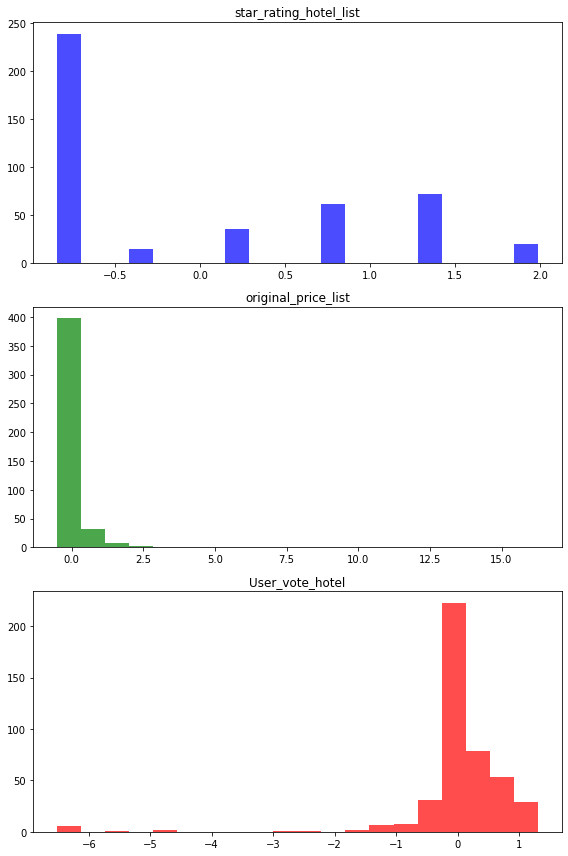

In [29]:
import matplotlib.pyplot as plt
data[['User_vote_hotel' , 'star_rating_hotel_list', 'original_price_list']] = scaler.fit_transform(data[['User_vote_hotel' , 'star_rating_hotel_list', 'original_price_list']])

# Tạo một hình vẽ với 3 cột dữ liệu
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Trực quan hóa cột 'star_rating_hotel_list_normalized'
axs[0].hist(data['star_rating_hotel_list'], bins=20, color='blue', alpha=0.7)
axs[0].set_title('star_rating_hotel_list')

# Trực quan hóa cột 'original_price_list_normalized'
axs[1].hist(data['original_price_list'], bins=20, color='green', alpha=0.7)
axs[1].set_title('original_price_list')

# Trực quan hóa cột 'User_vote_hotel_normalized'
axs[2].hist(data['User_vote_hotel'], bins=20, color='red', alpha=0.7)
axs[2].set_title('User_vote_hotel')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()
